### Instrument Recognition
- Goal : Process the recording and provide list of all musical instruments used.
- InstrumentRecognition_GroundTruth - contains the actual instruments used as I was present there.
- Double checked for human error by me. :P
- Actions taken till now :
    1. Created GitHub repository, cloned locally.
    2. Added the files containing the recording and the ground truth.
    3. Conversation with PPR about the idea of the project.
- Action to be taken now :
    1. PPR recommends that the first step is to load the datafile and try to process the audio into a Python array.
- Thoughts :
    1. Google the same.
- Results :
    1. Google search term : "https://www.google.com/search?client=safari&rls=en&q=parse+audio+file+into+an+array+in+python&ie=UTF-8&oe=UTF-8"
    2. First result : https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3
    3. Method employed to learn : Depth First Search
    4. After the first set of issues, I've resorted to Breadth First Search.
    5. The result which worked : https://stackoverflow.com/questions/50535637/how-to-load-m4a-file-in-python
    6. Next Google Search Term : pydub audiosegment to numpy array
    7. First Result : https://stackoverflow.com/questions/38015319/how-to-create-a-numpy-array-from-a-pydub-audiosegment
    

In [11]:
from pydub import AudioSegment
import numpy as np
theAudio = AudioSegment.from_file("allNotesSlow.m4a")

In [12]:
theAudio

In [13]:
theArray = theAudio.get_array_of_samples()

In [14]:
theArray = np.array(theArray)

In [15]:
type(theArray)

numpy.ndarray

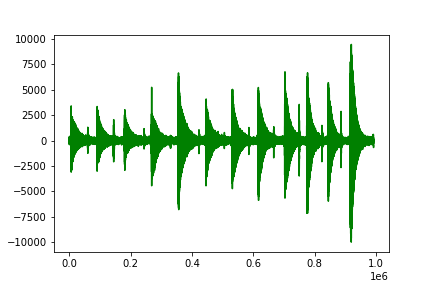

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
%matplotlib widget

if plt:
    plt.close() 
    

plt.figure("New Recording 2")
plt.plot(theArray,"green")
plt.show()

### Task 1 Complete.
- The audio file is now parsed as a numpy array - "theArray"
- Date : 04/12/2022

### Task 2 : Plot a spectrogram.
- A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. 
- Wiki : https://en.wikipedia.org/wiki/Spectrogram


In [17]:
import librosa
theAudio, sr = librosa.load("allNotesSlow.m4a")

/Users/suddu/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


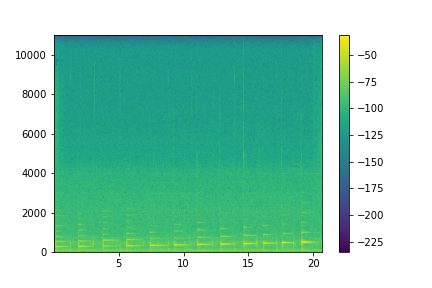

In [47]:
%matplotlib inline
%matplotlib widget

if plt:
    plt.close()
plt.specgram(theAudio,NFFT=1000, Fs=sr, noverlap=100)
plt.colorbar()
plt.show()

In [21]:
valuesOfSpecGram = plt.specgram(theAudio,NFFT=1000, Fs=sr, noverlap=100)

In [22]:
spectogram_np = valuesOfSpecGram[0]

In [23]:
sumOfSpectogram = np.sum(spectogram_np, axis=0)

In [24]:
sumOfSpectogram = np.expand_dims(sumOfSpectogram, axis=0)

In [25]:
sumOfSpectogram.shape

(1, 506)

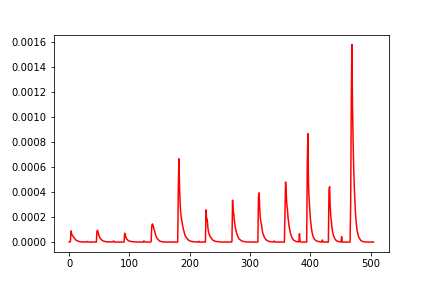

In [48]:
if plt:
    plt.close()
plt.plot(sumOfSpectogram[0],color="red")
plt.show()


In [49]:
outputName = []
threshold = 7e-5
for eachItem in sumOfSpectogram[0]:
    if eachItem > threshold:
        outputName.append(1)
    else:
        outputName.append(0)


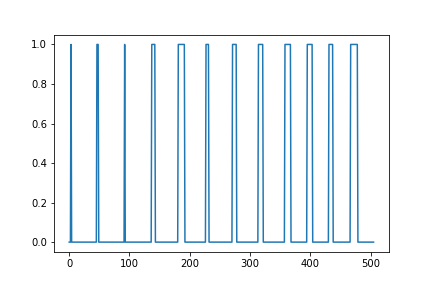

In [50]:
if plt:
    plt.close()
    
plt.plot(outputName)

In [51]:
specNP = np.transpose(spectogram_np,(1,0))

In [52]:
specNP.shape

(506, 501)

In [53]:
spectogram_np.shape

(501, 506)

In [54]:
def plotX(X):
    if plt:
        plt.close()

    plt.plot(X)
    plt.show()

506 505


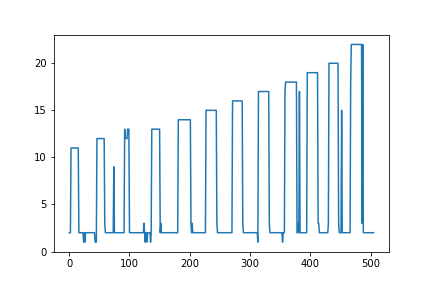

In [55]:

frequency = []
beta = 0.1

for i,val in enumerate(specNP):
    for j in range(len(val)):
        if(val[j]-max(val) * beta)>0:
            frequency.append(j)
            break;

print(len(frequency),i)
plotX(frequency)

In [56]:
type(frequency)

list

In [57]:
type(outputName)

list

In [58]:

frequency = np.array(frequency)
outputName = np.array(outputName[:len(frequency)])
anotherResult = np.dot(frequency,outputName)
anotherResult



1365

In [59]:
frequency.shape

(506,)

In [60]:
outputName.shape

(506,)

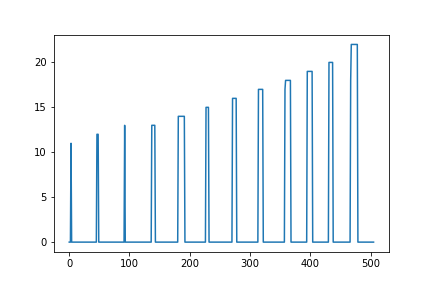

In [61]:
someName = []
for index, eachItem in enumerate(frequency):
    someName.append(eachItem * outputName[index])
plotX(someName)

### Musical Notes

### Hypothesis  : Each note increases in frequency in a linear fashion 

In [62]:
musicalNotes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

In [63]:
noteFrequencies = list(range(len(musicalNotes))) 

noteFrequencies = np.array(noteFrequencies) + 11

noteFrequencies


array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [64]:
# outputName

In [65]:
resultList = [] 

for index,value in enumerate(outputName):
    if value == 1:
        anotherList = noteFrequencies - frequency[index]
        for idx,eachItem in enumerate(anotherList):
            if eachItem == 0:
#                 resultSet.add(musicalNotes[idx])
                if musicalNotes[idx] not in resultList:
        
                    resultList.append(musicalNotes[idx])
        
        
        
    
resultList
        

['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'B']

### Task of the day : Record from Mic to Numpy array
- Date : April 20th


In [12]:
# import sounddevice as sd
# from scipy.io.wavfile import write
# import time
# import matplotlib.pyplot as plt

# # fs = 44100  # Sample rate
# # seconds = 1  # Duration of recording

# # myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
# # sd.wait()  # Wait until recording is finished
# # write('output.wav', fs, myrecording)  # Save as WAV file 

In [20]:


# t_end = time.time() + 10 * 1
# while time.time() < t_end:
#     # do whatever you do
#     fs = 44100  # Sample rate
#     seconds = 1  # Duration of recording
#     myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
#     sd.wait()  # Wait until recording is finished
#     theArray2Spec = myrecording


In [21]:
# from IPython.display import Audio


In [23]:
# Audio(theArray2Spec, rate=20000)

In [26]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
import google.colab
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

ModuleNotFoundError: No module named 'google.colab'

In [27]:
https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb#scrollTo=OIMPC3xuQMAO

SyntaxError: invalid syntax (<ipython-input-27-763f7aa3a64a>, line 1)